In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Load dataset and changes the dataset

In [2]:
df = pd.read_csv('thesisbangladataset.csv')

In [145]:
df.head()

,text,target,Label,num_words,num_sentences,num_characters,transformed_text
0,এলাকায় আসিস খুন ফেলে রাখবো তকে আমারে ত চিনিস ত...,0,1,12,1,58,ত
1,কুরআন কিতাব টাই ভুল অন্য ধর্ম ঝাড়া আল্লাহ কাল্...,0,1,19,1,110,
2,বাংলাদেশি খেলোয়ারদের খারাপ আচরনের আইসিসি আদালত...,1,0,11,1,80,কর
3,তুই ভুলে যাইস আগের কথা সামনে পাইলে ছিড়া ফেলমু,0,1,9,1,45,
4,কেনো শুধু শুধু অন্যের ঘাড়ে পা রেখে উপরে উঠতে চ...,1,0,32,1,187,মই


In [4]:
df.shape

(11326, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11326 entries, 0 to 11325
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11326 non-null  int64 
 1   cleaned     11326 non-null  object
 2   Class       11326 non-null  object
 3   Label       11326 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 354.1+ KB


In [6]:
df.sample()

,Unnamed: 0,cleaned,Class,Label
8832,8832,জুতা লীগ সরকার ক্ষমতায় মানে ইলুমিনাত এজেন্ট,AG,1


In [7]:
df.rename(columns={'cleaned':'text','Class':'target'},inplace=True)

In [8]:
df.sample()

,Unnamed: 0,text,target,Label
10112,10112,ইসলাম ধর্মে নারীর কোনো মর্যাদা ও সম্মান নেই ইস...,AG,1


In [9]:
df["target"].unique()

array(['AG', 'NoAG'], dtype=object)

In [10]:
df["target"].value_counts()

target
NoAG    5845
AG      5481
Name: count, dtype: int64

# Here we use label encode

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
label_encoder=LabelEncoder()

In [13]:
print (label_encoder)

LabelEncoder()


In [14]:
df["target"] = label_encoder.fit_transform(df["target"])

In [15]:
df.head()

,Unnamed: 0,text,target,Label
0,0,এলাকায় আসিস খুন করে ফেলে রাখবো তকে আমারে ত চিন...,0,1
1,1,কুরআন কিতাব টাই তো ভুল এবং অন্য ধর্ম থেকে ঝাড়া...,0,1
2,2,বাংলাদেশি খেলোয়ারদের সাথে খারাপ আচরনের জন্য আই...,1,0
3,3,তুই ভুলে যাইস না আগের কথা সামনে পাইলে কিন্তু ছ...,0,1
4,4,কেনো শুধু শুধু অন্যের ঘাড়ে পা রেখে উপরে উঠতে চ...,1,0


# Removing unnecessary column

In [16]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [17]:
df.head()

,text,target,Label
0,এলাকায় আসিস খুন করে ফেলে রাখবো তকে আমারে ত চিন...,0,1
1,কুরআন কিতাব টাই তো ভুল এবং অন্য ধর্ম থেকে ঝাড়া...,0,1
2,বাংলাদেশি খেলোয়ারদের সাথে খারাপ আচরনের জন্য আই...,1,0
3,তুই ভুলে যাইস না আগের কথা সামনে পাইলে কিন্তু ছ...,0,1
4,কেনো শুধু শুধু অন্যের ঘাড়ে পা রেখে উপরে উঠতে চ...,1,0


# Chacked duplicate and missing value

In [18]:
df.shape

(11326, 3)

In [19]:
# missing value
df.isnull().sum()

text      0
target    0
Label     0
dtype: int64

In [20]:
# check for duplicate value
df.duplicated().sum()

154

In [21]:
df= df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [22]:
df.shape

(11172, 3)

# Removing stop word

In [23]:
custom_bengali_stopwords = [
    "আমি","কি","সে","জন্য","এবং","এক","একটা","এ","ও","যে","এর","মনে","সব","নাই","আমরা","কেন","করা","সাথে","তো","না","করে","আমার","একটি",
    "যদি","দিয়ে","আর","নিয়ে","ছিল","হবে","থেকে","তার","কিন্তু","করা","এটা","এই"]  # Add more as needed

# Define a function to remove stop words from a given text using custom stop words
def remove_stopwords(text):
  
    words = text.split()    
    words = [word for word in words if word not in custom_bengali_stopwords]
    return ' '.join(words)
# Apply the modified remove_stopwords function to the 'text' column
df['text'] = df['text'].apply(remove_stopwords)

In [24]:
df.head(5)

,text,target,Label
0,এলাকায় আসিস খুন ফেলে রাখবো তকে আমারে ত চিনিস ত...,0,1
1,কুরআন কিতাব টাই ভুল অন্য ধর্ম ঝাড়া আল্লাহ কাল্...,0,1
2,বাংলাদেশি খেলোয়ারদের খারাপ আচরনের আইসিসি আদালত...,1,0
3,তুই ভুলে যাইস আগের কথা সামনে পাইলে ছিড়া ফেলমু,0,1
4,কেনো শুধু শুধু অন্যের ঘাড়ে পা রেখে উপরে উঠতে চ...,1,0


In [25]:
#NUM OF WORDS
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df['num_sentences']= df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df['num_characters'] = df['text'].apply(len)

In [28]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,11172.000000,11172.000000,11172.0
mean,107.858575,17.807107,1.0
std,135.471050,21.627194,0.0
min,6.000000,1.000000,1.0
25%,48.000000,8.000000,1.0
50%,78.000000,13.000000,1.0
75%,124.000000,21.000000,1.0
max,3000.000000,478.000000,1.0


In [29]:
df.head(5)

,text,target,Label,num_words,num_sentences,num_characters
0,এলাকায় আসিস খুন ফেলে রাখবো তকে আমারে ত চিনিস ত...,0,1,12,1,58
1,কুরআন কিতাব টাই ভুল অন্য ধর্ম ঝাড়া আল্লাহ কাল্...,0,1,19,1,110
2,বাংলাদেশি খেলোয়ারদের খারাপ আচরনের আইসিসি আদালত...,1,0,11,1,80
3,তুই ভুলে যাইস আগের কথা সামনে পাইলে ছিড়া ফেলমু,0,1,9,1,45
4,কেনো শুধু শুধু অন্যের ঘাড়ে পা রেখে উপরে উঠতে চ...,1,0,32,1,187


# corpus

In [30]:
spam_corpus=[]
for msg in df[df['target']==0]['text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [31]:
len(spam_corpus)

68394

In [32]:
from collections import Counter
Counter(spam_corpus).most_common(10)

[('ধর্ম', 514),
 ('তোর', 507),
 ('কে', 406),
 ('ইসলাম', 359),
 ('হিন্দু', 356),
 ('তুই', 347),
 ('কোন', 294),
 ('আছে', 291),
 ('কথা', 282),
 ('তোদের', 282)]

In [33]:
ham_corpus=[]
for msg in df[df['target']==1]['text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [34]:
len(ham_corpus)

130192

In [35]:
from collections import Counter
Counter(ham_corpus).most_common(10)

[('করতে', 654),
 ('তারা', 603),
 ('কিছু', 579),
 ('আছে', 548),
 ('আমাদের', 547),
 ('হয়', 515),
 ('ভাল', 493),
 ('অনেক', 486),
 ('তাদের', 474),
 ('হয়', 438)]

In [36]:
df.head(5)

,text,target,Label,num_words,num_sentences,num_characters
0,এলাকায় আসিস খুন ফেলে রাখবো তকে আমারে ত চিনিস ত...,0,1,12,1,58
1,কুরআন কিতাব টাই ভুল অন্য ধর্ম ঝাড়া আল্লাহ কাল্...,0,1,19,1,110
2,বাংলাদেশি খেলোয়ারদের খারাপ আচরনের আইসিসি আদালত...,1,0,11,1,80
3,তুই ভুলে যাইস আগের কথা সামনে পাইলে ছিড়া ফেলমু,0,1,9,1,45
4,কেনো শুধু শুধু অন্যের ঘাড়ে পা রেখে উপরে উঠতে চ...,1,0,32,1,187


# remove digits

In [37]:
import re

In [38]:
bangla_digits_pattern = '[০১২৩৪৫৬৭৮৯]'
total_digit_count = 0
for index, row in df.iterrows():
    text = row['text']
    digit_count = len(re.findall(bangla_digits_pattern, text))
    total_digit_count += digit_count
print("Total Bangla digits in the dataset: ", total_digit_count)

Total Bangla digits in the dataset:  2629


In [39]:
bangla_digits_pattern = '[০১২৩৪৫৬৭৮৯]'
for index, row in df.iterrows():
    text = row['text']
    text_without_bangla_digits = re.sub(bangla_digits_pattern, '', text)
    df.at[index, 'text'] = text_without_bangla_digits

In [40]:
bangla_digits_pattern_after = '[০১২৩৪৫৬৭৮৯]'
total_digit_count_after = 0
for index, row in df.iterrows():
    text = row['text']
    digit_count = len(re.findall(bangla_digits_pattern_after, text))
    total_digit_count_after += digit_count
print("Total Bangla digits in the dataset: ", total_digit_count_after)

Total Bangla digits in the dataset:  0


# EDA

In [41]:
df['target'].value_counts()

target
1    5705
0    5467
Name: count, dtype: int64

In [42]:
import matplotlib.pyplot as plt

In [43]:
df.head()

,text,target,Label,num_words,num_sentences,num_characters
0,এলাকায় আসিস খুন ফেলে রাখবো তকে আমারে ত চিনিস ত...,0,1,12,1,58
1,কুরআন কিতাব টাই ভুল অন্য ধর্ম ঝাড়া আল্লাহ কাল্...,0,1,19,1,110
2,বাংলাদেশি খেলোয়ারদের খারাপ আচরনের আইসিসি আদালত...,1,0,11,1,80
3,তুই ভুলে যাইস আগের কথা সামনে পাইলে ছিড়া ফেলমু,0,1,9,1,45
4,কেনো শুধু শুধু অন্যের ঘাড়ে পা রেখে উপরে উঠতে চ...,1,0,32,1,187


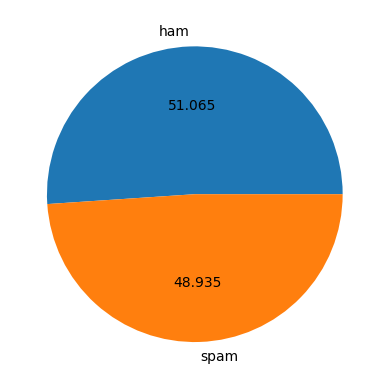

In [144]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.3f")
plt.show()

In [45]:
import nltk

In [46]:
df['text'].apply(len)

0         58
1        110
2         80
3         45
4        187
        ... 
11321    102
11322    226
11323     83
11324    163
11325     24
Name: text, Length: 11172, dtype: int64

In [47]:
df['num_characters'] = df['text'].apply(len)

In [48]:
df.head()

,text,target,Label,num_words,num_sentences,num_characters
0,এলাকায় আসিস খুন ফেলে রাখবো তকে আমারে ত চিনিস ত...,0,1,12,1,58
1,কুরআন কিতাব টাই ভুল অন্য ধর্ম ঝাড়া আল্লাহ কাল্...,0,1,19,1,110
2,বাংলাদেশি খেলোয়ারদের খারাপ আচরনের আইসিসি আদালত...,1,0,11,1,80
3,তুই ভুলে যাইস আগের কথা সামনে পাইলে ছিড়া ফেলমু,0,1,9,1,45
4,কেনো শুধু শুধু অন্যের ঘাড়ে পা রেখে উপরে উঠতে চ...,1,0,32,1,187


In [49]:
# 0 spam and 1 ham

In [50]:
#NUM OF WORDS
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [51]:
df['num_sentences']= df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [52]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,11172.000000,11172.000000,11172.0
mean,107.623255,17.719388,1.0
std,135.352398,21.586215,0.0
min,6.000000,1.000000,1.0
25%,48.000000,8.000000,1.0
50%,78.000000,13.000000,1.0
75%,123.000000,20.000000,1.0
max,3000.000000,478.000000,1.0


In [53]:
import seaborn as sns

In [54]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5705.000000,5705.000000,5705.0
mean,140.151271,22.744084,1.0
std,175.530595,27.975503,0.0
min,6.000000,1.000000,1.0
25%,68.000000,11.000000,1.0
50%,101.000000,17.000000,1.0
75%,150.000000,24.000000,1.0
max,3000.000000,478.000000,1.0


In [55]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5467.000000,5467.000000,5467.0
mean,73.679166,12.475947,1.0
std,55.066213,9.041430,0.0
min,8.000000,1.000000,1.0
25%,38.000000,7.000000,1.0
50%,57.000000,10.000000,1.0
75%,92.000000,15.000000,1.0
max,739.000000,122.000000,1.0


<Axes: xlabel='num_characters', ylabel='Count'>

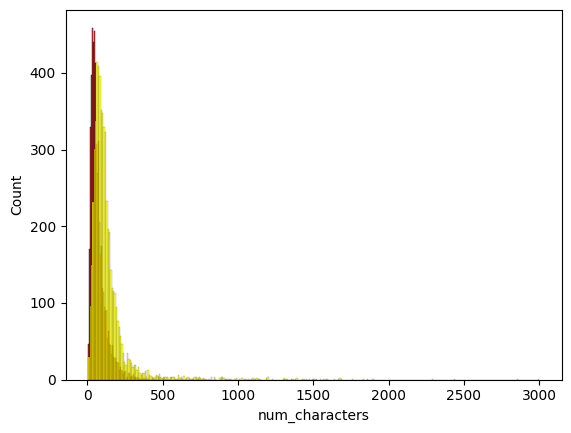

In [56]:
sns.histplot(df[df['target']==0]['num_characters'],color='red')
sns.histplot(df[df['target']==1]['num_characters'],color='yellow')

<Axes: xlabel='num_words', ylabel='Count'>

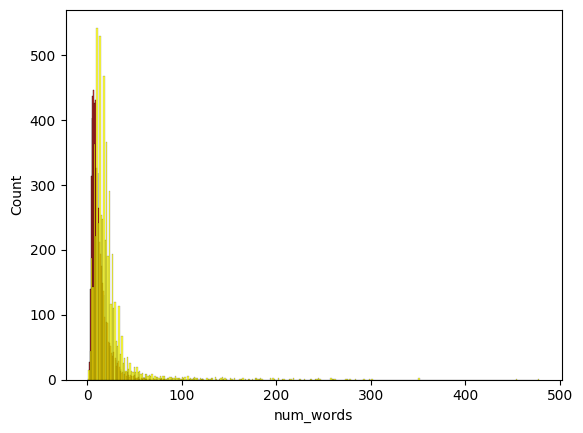

In [57]:
sns.histplot(df[df['target']==0]['num_words'],color='red')
sns.histplot(df[df['target']==1]['num_words'],color='yellow')

<Axes: >

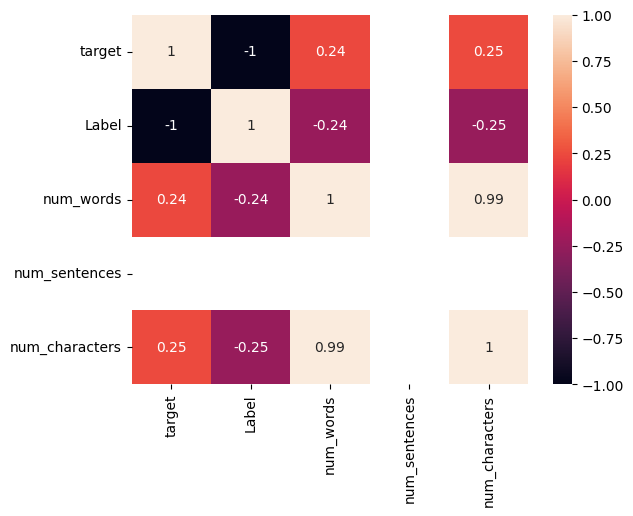

In [58]:
# we you have a DataFrame df and you want to include only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True)

In [59]:
df.head()

,text,target,Label,num_words,num_sentences,num_characters
0,এলাকায় আসিস খুন ফেলে রাখবো তকে আমারে ত চিনিস ত...,0,1,12,1,58
1,কুরআন কিতাব টাই ভুল অন্য ধর্ম ঝাড়া আল্লাহ কাল্...,0,1,19,1,110
2,বাংলাদেশি খেলোয়ারদের খারাপ আচরনের আইসিসি আদালত...,1,0,11,1,80
3,তুই ভুলে যাইস আগের কথা সামনে পাইলে ছিড়া ফেলমু,0,1,9,1,45
4,কেনো শুধু শুধু অন্যের ঘাড়ে পা রেখে উপরে উঠতে চ...,1,0,32,1,187


# wordcloud

In [60]:
import string
import nltk
from nltk.corpus import stopwords
import string
# Replace 'your/actual/nltk_data_directory' with the path you want to use
nltk.data.path.append('your/actual/nltk_data_directory')
# Download Bengali stopwords data
nltk.download('stopwords', download_dir='your/actual/nltk_data_directory')

def transform_text(text):
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    # Specify language as 'bengali'
    for i in text:
        if i not in stopwords.words('bengali') and i not in string.punctuation:
            y.append(i)
            
    return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     your/actual/nltk_data_directory...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [61]:
df['transformed_text'] = df['text'].apply(transform_text)

In [62]:
from wordcloud import WordCloud
wc = WordCloud(font_path='kalpurush.ttf',width=500,height=500,min_font_size=10,background_color='white')

In [63]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

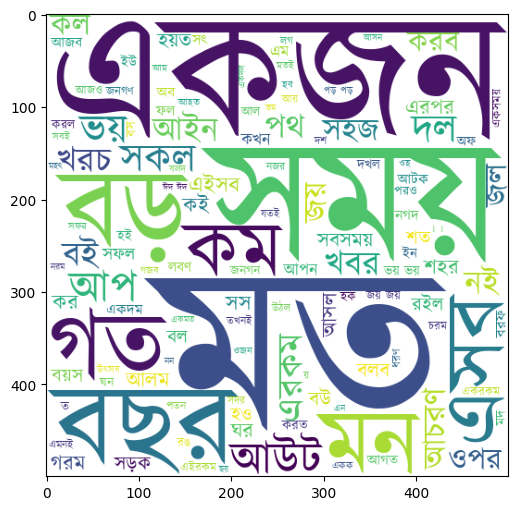

In [64]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [65]:
spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

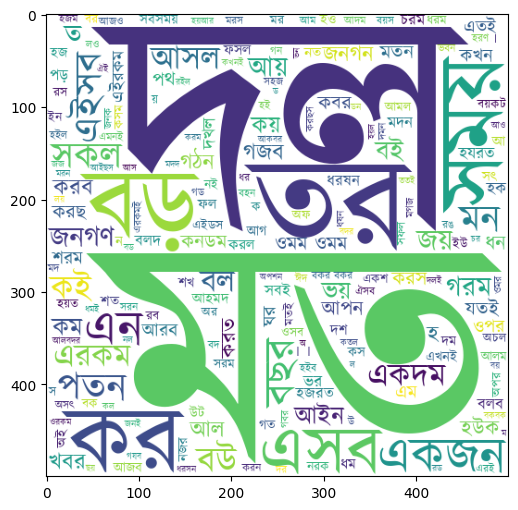

In [66]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [67]:
df.head()

,text,target,Label,num_words,num_sentences,num_characters,transformed_text
0,এলাকায় আসিস খুন ফেলে রাখবো তকে আমারে ত চিনিস ত...,0,1,12,1,58,ত
1,কুরআন কিতাব টাই ভুল অন্য ধর্ম ঝাড়া আল্লাহ কাল্...,0,1,19,1,110,
2,বাংলাদেশি খেলোয়ারদের খারাপ আচরনের আইসিসি আদালত...,1,0,11,1,80,কর
3,তুই ভুলে যাইস আগের কথা সামনে পাইলে ছিড়া ফেলমু,0,1,9,1,45,
4,কেনো শুধু শুধু অন্যের ঘাড়ে পা রেখে উপরে উঠতে চ...,1,0,32,1,187,মই


# Model and algorithms are build

In [68]:
x = df.text.values
y = df.target.values

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [72]:
cv = TfidfVectorizer()
x_train=cv.fit_transform(xtrain)

In [73]:
x_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# This is for multinomialNB

In [75]:
x_train_dense = x_train.toarray()
model = MultinomialNB()
model.fit(x_train_dense,ytrain)

MultinomialNB()

In [76]:
x_test= cv.transform(xtest)

In [77]:
x_test.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [78]:
x_test_dense = x_test.toarray()
accuracy = model.score(x_test_dense, ytest)
print("Accuracy:", accuracy)

Accuracy: 0.788782816229117


In [79]:
model.score(x_train_dense,ytrain)

0.8445012787723786

In [80]:
pred = model.predict(x_test_dense)
pred

array([1, 0, 1, ..., 1, 1, 0])

In [81]:
confusion_matrix(ytest,pred)

array([[1171,  467],
       [ 241, 1473]], dtype=int64)

In [82]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77      1638
           1       0.76      0.86      0.81      1714

    accuracy                           0.79      3352
   macro avg       0.79      0.79      0.79      3352
weighted avg       0.79      0.79      0.79      3352



# This is for bernouliNB

In [83]:
x_train_dense = x_train.toarray()
model1 = BernoulliNB()
model1.fit(x_train_dense,ytrain)

BernoulliNB()

In [84]:
x_test= cv.transform(xtest)
x_test.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [85]:
x_test_dense = x_test.toarray()
accuracy = model1.score(x_test_dense, ytest)
print("Accuracy:", accuracy)

Accuracy: 0.7526849642004774


In [86]:
model1.score(x_train_dense,ytrain)

0.7847826086956522

In [87]:
pred = model1.predict(x_test_dense)
pred

array([1, 0, 1, ..., 0, 0, 0])

In [88]:
confusion_matrix(ytest,pred)

array([[1469,  169],
       [ 660, 1054]], dtype=int64)

In [89]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78      1638
           1       0.86      0.61      0.72      1714

    accuracy                           0.75      3352
   macro avg       0.78      0.76      0.75      3352
weighted avg       0.78      0.75      0.75      3352



# This is for Random forest classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=190,random_state=1)
rf_model.fit(x_train, ytrain)

RandomForestClassifier(n_estimators=190, random_state=1)

In [91]:
x_test= cv.transform(xtest)
x_test.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [92]:
accuracy = rf_model.score(x_test, ytest)
print("Accuracy:", accuracy)

Accuracy: 0.7869928400954654


In [93]:
pred = rf_model.predict(x_test)
pred

array([1, 1, 1, ..., 0, 0, 1])

In [94]:
confusion_matrix(ytest,pred)

array([[1255,  383],
       [ 331, 1383]], dtype=int64)

In [95]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1638
           1       0.78      0.81      0.79      1714

    accuracy                           0.79      3352
   macro avg       0.79      0.79      0.79      3352
weighted avg       0.79      0.79      0.79      3352



# This is for logistic regression

In [96]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train, ytrain)

LogisticRegression(random_state=42)

In [97]:
x_test= cv.transform(xtest)
x_test.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [98]:
accuracy = lr_model.score(x_test, ytest)
print("Accuracy:", accuracy)

Accuracy: 0.8025059665871122


In [99]:
pred = lr_model.predict(x_test)
pred

array([1, 0, 1, ..., 0, 0, 0])

In [100]:
confusion_matrix(ytest,pred)

array([[1276,  362],
       [ 300, 1414]], dtype=int64)

In [101]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1638
           1       0.80      0.82      0.81      1714

    accuracy                           0.80      3352
   macro avg       0.80      0.80      0.80      3352
weighted avg       0.80      0.80      0.80      3352



# k-fold for logistic regression

In [102]:
from sklearn.model_selection import cross_val_score

In [103]:
cv = TfidfVectorizer()
x_train=cv.fit_transform(xtrain)

In [104]:
cvscore1 = cross_val_score(lr_model,x_train,ytrain,cv=5)

In [105]:
cvscore1

array([0.80818414, 0.79923274, 0.80690537, 0.81138107, 0.78900256])

In [106]:
cvscore1.mean()

0.8029411764705883

# This is for support vector machine

In [107]:
from sklearn.svm import SVC
kernel_options = ['linear', 'rbf', 'poly', 'sigmoid']
svm_models = {}
# Loop through the kernel options and fit separate models for each
for kernel in kernel_options:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(x_train, ytrain)
    svm_models[kernel] = svm_model
    
svm_model1 = svm_models['rbf']

In [108]:
x_test= cv.transform(xtest)
x_test.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [109]:
accuracy = svm_model1.score(x_test, ytest)
print("Accuracy:", accuracy)

Accuracy: 0.8111575178997613


In [110]:
cleaned=["কিরে কাইল্লা কি করছ তুই "]

In [111]:
cv_cleaned=cv.transform(cleaned)

In [112]:
cv_cleaned_dense = cv_cleaned.toarray()

In [113]:
svm_model1.predict(cv_cleaned_dense)

array([0])

In [114]:
pred = svm_model1.predict(x_test)
pred

array([1, 0, 1, ..., 0, 0, 0])

In [115]:
from sklearn.metrics import accuracy_score

In [116]:
accuracy_score(ytest,pred)

0.8111575178997613

In [117]:
confusion_matrix(ytest,pred)

array([[1276,  362],
       [ 271, 1443]], dtype=int64)

In [118]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1638
           1       0.80      0.84      0.82      1714

    accuracy                           0.81      3352
   macro avg       0.81      0.81      0.81      3352
weighted avg       0.81      0.81      0.81      3352



# k fold for svm

In [119]:
from sklearn.model_selection import cross_val_score

In [120]:
cv = TfidfVectorizer()
x_train=cv.fit_transform(xtrain)

In [121]:
cvscore2 = cross_val_score(svm_model1,x_train,ytrain,cv=5)

In [122]:
cvscore2

array([0.81074169, 0.81074169, 0.80818414, 0.82097187, 0.79092072])

In [123]:
cvscore2.mean()

0.808312020460358

# Apply Stacking ensemble

In [124]:
estimators=[('svm',svm_model1),('rbf',lr_model)]
final_estimator=svm_models['rbf']

In [125]:
from sklearn.ensemble import StackingClassifier
clf= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [126]:
clf.fit(x_train,ytrain)

StackingClassifier(estimators=[('svm', SVC()),
                               ('rbf', LogisticRegression(random_state=42))],
                   final_estimator=SVC())

In [127]:
x_test= cv.transform(xtest)
x_test.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [128]:
y_pred=clf.predict(x_test)
print("accuracy",accuracy_score(ytest,y_pred))

accuracy 0.8105608591885441


In [129]:
pred = clf.predict(x_test)
pred

array([1, 0, 1, ..., 0, 0, 0])

In [130]:
from sklearn.metrics import accuracy_score
confusion_matrix(ytest,pred)

array([[1281,  357],
       [ 278, 1436]], dtype=int64)

In [131]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1638
           1       0.80      0.84      0.82      1714

    accuracy                           0.81      3352
   macro avg       0.81      0.81      0.81      3352
weighted avg       0.81      0.81      0.81      3352



# Using k-fold for stacking ensemble model

In [132]:
from sklearn.model_selection import cross_val_score

In [133]:
cv = TfidfVectorizer()
x_train=cv.fit_transform(xtrain)

In [134]:
cvscore4 = cross_val_score(clf,x_train,ytrain,cv=5)

In [135]:
cvscore4

array([0.81329923, 0.81265985, 0.80690537, 0.82480818, 0.79411765])

In [136]:
cvscore4.mean()

0.8103580562659847

# PICKLE DONE HERE

In [137]:
import pickle

In [138]:
pickle.dump(clf, open("spam.pkl","wb"))

In [139]:
pickle.dump(cv, open("TfidfVectorizer.pkl","wb"))

In [140]:
cllf=pickle.load( open ("spam.pkl","rb"))

In [141]:
cllf

StackingClassifier(estimators=[('svm', SVC()),
                               ('rbf', LogisticRegression(random_state=42))],
                   final_estimator=SVC())

# PICKLE OUTPUT IS HERE

In [142]:
# HERE 0 MEANS SPAM AND 1 MEANS NON SPAM

In [143]:
msg ="﻿হুঁশিয়ার করে দিলাম সাবধান এত বাড়াবাড়ি ভালো না"
data =[msg]
vect=cv.transform(data).toarray()
result=clf.predict(vect)
print(result)

[0]
